# Project: Wrangling and Analyze Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
%matplotlib inline

## Data Gathering

1. Use pandas to read the csv file in the local machine(twitter_archive_enhanced.csv)

In [2]:
# import the first dataset into our workspace
df1_og = pd.read_csv('twitter-archive-enhanced.csv')

# check it was imported without any errors
df1_og.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# import and save data programatically 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# write the request's response to a file
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [4]:
# assigning the tsv file into a dataframe   
df2_og = pd.read_csv('image-predictions.tsv', sep='\t')

# check it was imported without any errors
df2_og.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

- **NB: I wasn't granted access to the API so I used the alternative method by downloading the file manually, however I still included the code for querying the API because it was required albeit the cell below will not run.**

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1_og.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
df = []

# reading the file line by line into a dataframe using a for loop
with open("tweet-json.txt") as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet["id"]
        retweet_count = tweet["retweet_count"]
        favorite_count = tweet["favorite_count"]
        retweeted = tweet["retweeted"]
        df.append({"retweet_count" : retweet_count,
                  "favorite_count" : favorite_count,
                  "retweeted": retweeted,
                  "tweet_id" : tweet_id})

# create a dataframe and assign the list created earlier as the data for the dataframe        
df3_og = pd.DataFrame(df, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted"])

In [6]:
# check it was imported without any errors
df3_og.head()

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False


## Assessing Data



## 1. Visual Assessment

- Visual inspection of each dataset

In [7]:
df1_og

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
df2_og

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
df3_og

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False
...,...,...,...,...
2349,666049248165822465,41,111,False
2350,666044226329800704,147,311,False
2351,666033412701032449,47,128,False
2352,666029285002620928,48,132,False


## 2. Programmatic Assessment

* Using pandas functions and methods

In [10]:
df1_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df1_og.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df2_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df2_og.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
df3_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


In [15]:
df3_og.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1. The datatype of the "tweet_id" column is integer and should be object.



2. Some of the dog names in the 'p1_conf', 'p2_conf' and 'p3_conf' columns aren't consistent as some start with upper case while the other are all in lowercase.



3. The "timestamp" column data type is an object instead of a datetime data type.



4. Rating denominator not constant and outliers in rating numerators.
 
 

5. Retweets are included in the dataset.



6. Drop **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id** and **retweeted_status_timestamp** as they have too many missing values.



7. The "source" column is ambiguous.



8. Inconsistent use of lowercase and uppercase and underscores in p1, p2,p3 columns.


9. Creating year and month columns from timestamp and dropping timestamp.

### Tidiness issues
1. The 'doggo', 'floofer', 'pupper' and 'puppo' columns should all be combined. The observations are recorded as variables instead of values.



2. Merge the dataframes df1, df2, and df3 as the datasets are part of the same observational unit.

## Cleaning Data


In [16]:
# Make copies of original pieces of data
df1_clean = df1_og.copy()
df2_clean = df2_og.copy()
df3_clean = df3_og.copy()

### Issue #1: The datatype of the "tweet_id" column is integer and should be object.

#### Define

The "tweet_id" column in all three datasets should be datatype object 

#### Code

In [17]:
#using pandas method to fix the columns
df1_clean.tweet_id = df1_clean.tweet_id.astype("object")
df2_clean.tweet_id = df2_clean.tweet_id.astype("object")
df3_clean.tweet_id = df3_clean.tweet_id.astype("object")

#### Test

In [18]:
#confirming the columns are now the correct datatype
print("df1:",df1_clean["tweet_id"].dtypes)
print("df2:",df2_clean["tweet_id"].dtypes)
print("df3:",df3_clean["tweet_id"].dtypes)

df1: object
df2: object
df3: object


### Issue #2: Some of the dog names in the 'p1_conf', 'p2_conf' and 'p3_conf' columns aren't consistent as some start with upper case while the other are all in lowercase.

#### Define

We are going to convert all the dog names to lower case to ensure consistency.

#### Code

In [19]:
#using pandas method to fix the columns
df2_clean["p1"] = df2_clean["p1"].str.lower()
df2_clean["p2"] = df2_clean["p2"].str.lower()
df2_clean["p3"] = df2_clean["p3"].str.lower()

#### Test

In [20]:
print(df2_clean["p1"].value_counts().head())
print(df2_clean["p2"].value_counts().head())
df2_clean["p3"].value_counts().head()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
Name: p1, dtype: int64
labrador_retriever    104
golden_retriever       92
cardigan               74
chihuahua              44
pomeranian             42
Name: p2, dtype: int64


labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
Name: p3, dtype: int64

### Issue #3: The "timestamp" column data type is an object instead of a datetime data type.

#### Define

The timestamp column in any dataset should always be of datatype date-time and not object.

#### Code

In [21]:
df1_clean.timestamp = pd.to_datetime(df1_clean.timestamp)

#### Test

In [22]:
df1_clean.timestamp.dtypes

datetime64[ns, UTC]

### Issue #4: Rating denominator not constant and outliers in rating numerators.

#### Define

Removing denominator rating that is not equal to 10 and numerator rating that is greater than 15.

#### Code

In [23]:
df1_clean = df1_clean[~((df1_clean.rating_denominator != 10) | (df1_clean.rating_numerator > 15))]

In [24]:
df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Test

In [25]:
df1_clean[(df1_clean.rating_denominator != 10) | (df1_clean.rating_numerator > 15)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5: Retweets are included in the dataset.

#### Define

As per project specifications retweets are not meant to be included in our analysis

#### Code

In [26]:
retweets = df1_clean[df1_clean.text.str.startswith("RT")]
retweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [27]:
df1_clean = df1_clean.drop(retweets.index)

#### Test

In [28]:
df1_clean[df1_clean.text.str.startswith("RT")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6: Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp as they have too many missing values.

#### Define

Dropping columns with too many missing values

#### Code

In [29]:
df1_clean = df1_clean.drop(columns = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"])

#### Test 

In [30]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2142 non-null   object             
 1   timestamp           2142 non-null   datetime64[ns, UTC]
 2   source              2142 non-null   object             
 3   text                2142 non-null   object             
 4   expanded_urls       2092 non-null   object             
 5   rating_numerator    2142 non-null   int64              
 6   rating_denominator  2142 non-null   int64              
 7   name                2142 non-null   object             
 8   doggo               2142 non-null   object             
 9   floofer             2142 non-null   object             
 10  pupper              2142 non-null   object             
 11  puppo               2142 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #7: The "source" column is ambiguous.

#### Define

The source needs to be extracted from excessive and irrelevant information

#### Code

In [31]:
df1_clean["source"][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [32]:
#using string slicing to extract required text
df1_clean["source"] = df1_clean["source"].str.split('>').str[-2].str[:-3]

#### Test

In [33]:
df1_clean["source"].sample(6)

61      Twitter for iPhone
270     Twitter Web Client
2189    Twitter for iPhone
2244    Twitter for iPhone
364     Twitter for iPhone
1809    Twitter for iPhone
Name: source, dtype: object

In [34]:
df1_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Issue #8: The 'doggo', 'floofer', 'pupper' and 'puppo' columns should all be combined

#### Define

The observations are recorded as variables instead of values. We would have all the wrong column headers as observations in one column.

#### Code

In [35]:
#creating a function that contains values which we'll insert in a new column
def x(observation):
    if observation ["floofer"] == "None" and observation ["puppo"] == "None" and observation ["pupper"] == "None" and observation ["doggo"] == "None":
        val = "unknown"
    else:
        val = "None"
    return val
# creating a new column and applying the above function
df1_clean["unknown"] = df1_clean.apply(x, axis=1)

In [36]:
#checking if the new column was created as planned
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,unknown
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,unknown
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,unknown
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,unknown
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,unknown
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,unknown


In [37]:
#Unpivoting the DataFrame from wide to long format using the melt function
df1_clean = pd.melt(df1_clean, 
                    id_vars =["tweet_id", "timestamp", "source", "text", "expanded_urls", "rating_numerator", "rating_denominator", "name"],
                    value_vars = ["doggo", "floofer", "pupper", "puppo", "unknown"],
                    var_name = "dog_category", 
                    value_name = "value")

In [38]:
#removing duplicated rows
df1_clean = df1_clean[df1_clean["value"]!= "None"]
df1_clean.head();

In [39]:
#dropping the last unwanted column
df1_clean = df1_clean.drop("value", axis=1)

#### Test

In [40]:
df1_clean.dog_category.value_counts()

unknown    1799
pupper      233
doggo        87
puppo        25
floofer      10
Name: dog_category, dtype: int64

In [41]:
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
40,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
88,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo
96,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
97,871102520638267392,2017-06-03 20:33:19+00:00,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo


### Issue #9: Creating year and month columns from timestamp and dropping timestamp.

#### Define

Extracting year and month data from the timestamp column

#### Code

In [42]:
df1_clean["year"] = pd.DatetimeIndex(df1_clean["timestamp"]).year
df1_clean["month"] = pd.DatetimeIndex(df1_clean["timestamp"]).month
df1_clean.drop(columns = "timestamp", inplace= True)

#### Test

In [43]:
print(df1_clean.year.head())
df1_clean.month.head()

9     2017
40    2017
88    2017
96    2017
97    2017
Name: year, dtype: int64


9     7
40    7
88    6
96    6
97    6
Name: month, dtype: int64

### Issue #10: Inconsistent use of lowercase and uppercase and underscores in p1, p2,p3 columns.

#### Define

Replacing underscores with spaces and capitalizing first letter in the p1, p2 and p3 columns in df2.

#### Code

In [44]:
df2_clean["p1"] = df2_clean["p1"].str.capitalize().str.replace('_', " ")
df2_clean["p2"] = df2_clean["p2"].str.capitalize().str.replace('_', " ")
df2_clean["p3"] = df2_clean["p3"].str.capitalize().str.replace('_', " ")

#### Test

In [45]:
df2_clean[['p1','p2','p3']].sample(10)

,p1,p2,p3
1711,Swing,Welsh springer spaniel,Bow
318,Prayer rug,Doormat,Bib
502,Golden retriever,Welsh springer spaniel,Beagle
1605,Mousetrap,Black widow,Paddlewheel
677,Keeshond,Chow,German shepherd
2052,Limousine,Tow truck,Shopping cart
511,Chihuahua,Italian greyhound,Muzzle
1240,Traffic light,Fountain,Space shuttle
838,Australian terrier,Yorkshire terrier,Silky terrier
1171,Cup,Toy poodle,Consomme


### Issue #11: Merge the dataframes df1, df2, and df3 as the datasets are part of the same observational unit.

#### Define

Merging the three cleaned datasets

#### Code

In [46]:
df_master = pd.merge(df1_clean, df2_clean)
df_master = pd.merge(left= df_master, right= df3_clean)


#### Test

In [47]:
df_master.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category,year,month,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,retweeted
0,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,2017,7,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467,False
1,884162670584377345,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2017,7,...,True,Malinois,0.199396,True,Norwegian elkhound,0.049148,True,3128,20771,False
2,872967104147763200,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,2017,6,...,True,Chesapeake bay retriever,0.174145,True,German short-haired pointer,0.092861,True,5669,28031,False
3,871515927908634625,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,2017,6,...,True,Briard,0.020041,True,Swab,0.003228,False,3628,20730,False
4,869596645499047938,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,2017,5,...,True,Toy terrier,0.008054,True,Muzzle,0.006296,False,3327,16476,False


In [48]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1981 non-null   object 
 1   source              1981 non-null   object 
 2   text                1981 non-null   object 
 3   expanded_urls       1981 non-null   object 
 4   rating_numerator    1981 non-null   int64  
 5   rating_denominator  1981 non-null   int64  
 6   name                1981 non-null   object 
 7   dog_category        1981 non-null   object 
 8   year                1981 non-null   int64  
 9   month               1981 non-null   int64  
 10  jpg_url             1981 non-null   object 
 11  img_num             1981 non-null   int64  
 12  p1                  1981 non-null   object 
 13  p1_conf             1981 non-null   float64
 14  p1_dog              1981 non-null   bool   
 15  p2                  1981 non-null   object 
 16  p2_con

In [49]:
#dropping retweeted column since retweets have already been dropped
df_master.drop(columns ="retweeted", inplace=True)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1981 non-null   object 
 1   source              1981 non-null   object 
 2   text                1981 non-null   object 
 3   expanded_urls       1981 non-null   object 
 4   rating_numerator    1981 non-null   int64  
 5   rating_denominator  1981 non-null   int64  
 6   name                1981 non-null   object 
 7   dog_category        1981 non-null   object 
 8   year                1981 non-null   int64  
 9   month               1981 non-null   int64  
 10  jpg_url             1981 non-null   object 
 11  img_num             1981 non-null   int64  
 12  p1                  1981 non-null   object 
 13  p1_conf             1981 non-null   float64
 14  p1_dog              1981 non-null   bool   
 15  p2                  1981 non-null   object 
 16  p2_con

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
df_master.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data


In [51]:
#importing our master dataframe
df = pd.read_csv("twitter_archive_master.csv")
df.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category,year,month,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,2017,7,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
1,884162670584377345,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2017,7,...,0.707046,True,Malinois,0.199396,True,Norwegian elkhound,0.049148,True,3128,20771
2,872967104147763200,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,2017,6,...,0.476913,True,Chesapeake bay retriever,0.174145,True,German short-haired pointer,0.092861,True,5669,28031
3,871515927908634625,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,2017,6,...,0.974781,True,Briard,0.020041,True,Swab,0.003228,False,3628,20730
4,869596645499047938,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,2017,5,...,0.955156,True,Toy terrier,0.008054,True,Muzzle,0.006296,False,3327,16476


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1981 non-null   int64  
 1   source              1981 non-null   object 
 2   text                1981 non-null   object 
 3   expanded_urls       1981 non-null   object 
 4   rating_numerator    1981 non-null   int64  
 5   rating_denominator  1981 non-null   int64  
 6   name                1981 non-null   object 
 7   dog_category        1981 non-null   object 
 8   year                1981 non-null   int64  
 9   month               1981 non-null   int64  
 10  jpg_url             1981 non-null   object 
 11  img_num             1981 non-null   int64  
 12  p1                  1981 non-null   object 
 13  p1_conf             1981 non-null   float64
 14  p1_dog              1981 non-null   bool   
 15  p2                  1981 non-null   object 
 16  p2_con

### Insights

##### 1. The most popular name given to dogs rated

In [53]:
df.name.value_counts().head(10)

None       537
a           54
Charlie     11
Cooper      10
Oliver      10
Lucy        10
Penny        9
Tucker       9
Winston      8
Sadie        8
Name: name, dtype: int64

From this we can see that **Charlie** is the most populous name followed closely by **Cooper**, **Oliver** and **Lucy**.

###### 2. The dog category/stage with the most ratings

In [54]:
#removing every "unkown" value to make our analysis much better
category = df[df["dog_category"] == "unknown"]
df = df.drop(category.index)
df.dog_category.sample(20)

277     pupper
47       doggo
66       doggo
94      pupper
217     pupper
89     floofer
310      puppo
159     pupper
62       doggo
288     pupper
211     pupper
58       doggo
127     pupper
156     pupper
90     floofer
86     floofer
5        doggo
251     pupper
152     pupper
80       doggo
Name: dog_category, dtype: object

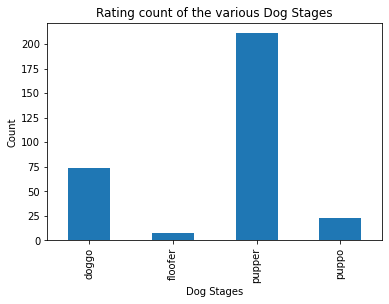

In [55]:
df.groupby("dog_category")["rating_numerator"].count().plot(kind="bar")
plt.xlabel("Dog Stages")
plt.ylabel("Count")
plt.title("Rating count of the various Dog Stages");

From the above visualization it is safe to say the "pupper" stage has the most ratings

##### 3. The top 5 most popular ratings of dogs

In [56]:
df.rating_numerator.value_counts().head()

12    77
11    73
10    59
13    47
9     17
Name: rating_numerator, dtype: int64

From the above analysis we can see that "12" was the most popular rating and "9" was the 5th most popular.

##### 4. Most favourited dog stage

In [57]:
df.groupby(['dog_category']).favorite_count.mean()

dog_category
doggo      18881.932432
floofer    13701.375000
pupper      7424.734597
puppo      22723.913043
Name: favorite_count, dtype: float64

From the above analysis we can see that "puppo" was the most favourited dog stage on average.

##### 5. The most used source by WeRateDogs users

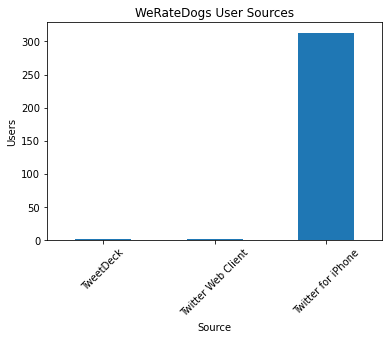

In [58]:
df.groupby('source').tweet_id.count().plot(kind="bar")
plt.xticks(rotation = 45)
plt.ylabel("Users")
plt.xlabel("Source")
plt.title("WeRateDogs User Sources");

From the above analysis we can see that iphone users are massively the overwhelming majority of WeRateDog users.

##### 6. Month of the year with the highest retweets

In [59]:
df.groupby("month").retweet_count.sum()

month
1     262984
2      93347
3      62338
4      74608
5     103082
6     206949
7     110404
8      12065
9      63357
10     32551
11     80020
12    121104
Name: retweet_count, dtype: int64

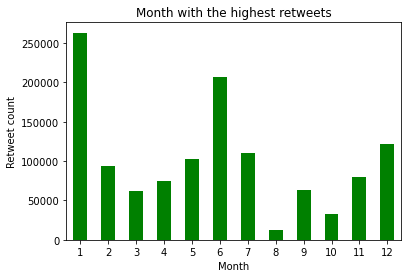

In [60]:
df.groupby("month").retweet_count.sum().plot(kind="bar", color="green")
plt.xticks(rotation = 360)
plt.xlabel("Month")
plt.ylabel("Retweet count")
plt.title("Month with the highest retweets");

From the above analysis we can see that december is the month with the most retweets which passes the ocular forehead test indicating a period of holiday and more user activity.